# meassurement of the accuracy 

accuracy is 
mean{ p in dotplot @ i,j  |  i,j in real_structure }

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=3)

from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')
import matplotlib.pyplot as plt

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Load data

In [2]:
import ShaKer.rna_tools.rna_io as rio

def getdata():
    return rio.get_all_data("../data/RNA16.react","../data/RNA16.dbn")  # {key: rea, seq, stru}

data = getdata()

for k,v in data.items():print k,"\t",  len(v[1])

SyntaxError: invalid syntax (<ipython-input-2-795c4b91acbb>, line 8)

# train predict

In [3]:
import ShaKer.simushape as sim
from ShaKer.rna_tools.rnaplfold import rnaplfold

data = getdata()
model  = sim.make_model(data,['23sRNA','R009'],sim.make_forestregressor())
data.pop("23sRNA")
data.pop("R009")
keys = data.keys()

def get_str(seq):
    for _, data_seq, db in data.values():
        if seq == data_seq:
            return [db]
    print "SHIT"

# acc_calculator needs seq struct rea
predictions = { k: (data[k][1],data[k][2],sim.predict(model,data[k][1], seq_to_db_function=get_str)) for k in keys  }

shaker_plain = { k: (data[k][1],data[k][2],sim.predict(model,data[k][1])) for k in keys  }


# get accuracy

In [4]:
from ShaKer.rna_tools.sukosd import sukosd
from ShaKer.rna_tools.rna_accuracy import get_structure_accuracy
import ShaKer.rna_tools.sukosd as suk

acc_shaker = {k: get_structure_accuracy (*predictions[k])  for  k in keys} 
acc_shaker_plain = {k: get_structure_accuracy(*shaker_plain[k]) for  k in keys} 
predictions_suko = [{ k: (data[k][1],data[k][2],sukosd(data[k][2])) for k in keys } for i in range(5)] 


acc_suko = [{k: get_structure_accuracy(*predictions_suko[i][k])  for  k in keys} for i in range(0,5)] 

acc_suko.sort(key=lambda x: sum(x.values()))
print acc_suko 
acc_suko = acc_suko[2] 

acc_real = {k: get_structure_accuracy(data[k][1],data[k][2],data[k][0])  for  k in keys}
acc_noshape = {k: get_structure_accuracy(data[k][1],data[k][2],None)  for  k in keys}
acc_thoretical_best = {k: get_structure_accuracy(data[k][1],data[k][2],[1.0 if e =='.' else 0.0 for e in data[k][2]]) for k in keys} 


#predictions_suko_predicted = { k: (data[k][1],data[k][2],suk.predict_Suko(data[k][1])) for k in keys }
#acc_suko_predicted = {k: get_structure_accuracy(*predictions_suko_predicted[k])  for  k in keys} 



[{'TRP5': 0.8541103689583331, '5srRNA': 0.925412454117647, 'GLYCFN': 0.9364163655813953, 'RNAsep': 0.6695184375555556, 'adenin': 0.9890717804761906, 'Z-CIDGMP-1': 0.7908001144000001, 'ZHCV': 0.6568404530769231, 'MDLOOP': 0.9992015220000001, 'srRNA': 0.5540005202857143, 'p564': 0.8797657289655173, 'tRNAphe': 0.9969042895238096, 'tRNA-asp': 0.5930854254545453, 'ADDRSW': 0.9908173757142859, 'ZGLY': 0.8844111627500002}, {'TRP5': 0.8993863291666667, '5srRNA': 0.9264312420588237, 'GLYCFN': 0.93739841627907, 'RNAsep': 0.6765015468888889, 'adenin': 0.9794026971428571, 'Z-CIDGMP-1': 0.8275329604000001, 'ZHCV': 0.88038735, 'MDLOOP': 0.995198083, 'srRNA': 0.2998737648571428, 'p564': 0.8462508512068966, 'tRNAphe': 0.9948702609523808, 'tRNA-asp': 0.9213447395454545, 'ADDRSW': 0.9980241095238097, 'ZGLY': 0.7005045240000001}, {'TRP5': 0.9180318164583334, '5srRNA': 0.9805092994117646, 'GLYCFN': 0.7683521358139538, 'RNAsep': 0.7356667617777778, 'adenin': 0.986934125714286, 'Z-CIDGMP-1': 0.6777399836, '

In [5]:
maxmultistruct = { k: (data[k][1],data[k][2],suk.predict_tmp(data[k][1])) for k in keys }
maxmultistructt = {k: get_structure_accuracy(*maxmultistruct[k])  for  k in keys} 
#pandata.to_csv(r'pandas.txt', header=None, index=index, sep=' ', mode='a')

# Visualize 

In [21]:
import pandas
import numpy as np
#index= ['Sukosd',"ShaKer+Structure", "known_strucure_max","ShaKer","Thermodynamic",'Experimental',"Sukosd multistructure", "Max Multistructure"]

index= [u"Sükösd et al.\n(ref. structure known)",
        "ShaKer\n(ref. structure known)", 
        #"Trivial binary\n(ref. structure known)",
        "ShaKer",
        "Thermodynamic\nprediction", "wetlab SHAPE"]

#data = map(lambda x: [x[k] for k in keys] ,[acc_suko, acc_shaker,acc_thoretical_best,acc_shaker_plain,acc_noshape, acc_real])
data = map(lambda x: [x[k] for k in keys] ,[acc_suko, acc_shaker,acc_shaker_plain,acc_noshape, acc_real])

print "Means:"
for i in range(0,5):
    print np.mean(data[i]) 
print "Standard deviation:"
for i in range(0,5):
    print np.std(data[i])

import seaborn as sns
sns.set_context("paper")
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
plt.xticks(rotation=60)

meanpointprops = dict(marker='o', markeredgecolor='green',markerfacecolor='w')
sns.boxplot(data=pandas.DataFrame(data, index=index).T,meanprops=meanpointprops, showmeans=True)
plt.title("Base pair Accuracy")
plt.grid()
axes = plt.gca()
axes.set_ylim([-0.005,1.005])
axes.set_ylabel("Accuracy")
axes.grid(b=True, which='major', color='w', linewidth=1.0)
plt.savefig("Accuracy.pdf", bbox_inches='tight')


NameError: name 'acc_suko' is not defined

In [12]:
# SAVING REULT
# is in repo
#asdf=pandas.DataFrame(data, index=index).T
#asdf.to_csv("accuracy_PAPER.csv",encoding = "utf-8")


In [3]:
import pandas as pd

In [19]:
zzz= pd.read_csv("accuracy_PAPER.csv")
del zzz["'asd'"]
zzz

,Sükösd et al. (ref. structure known),ShaKer (ref. structure known),Trivial binary (ref. structure known),ShaKer,Thermodynamic prediction,wetlab SHAPE
0,0.918032,0.901704,0.958850,0.899546,0.838098,0.821419
1,0.980509,0.923649,0.997156,0.259488,0.260634,0.252744
2,0.768352,0.985041,0.999256,0.370302,0.565605,0.000000
3,0.735667,0.683707,0.766092,0.567530,0.530544,0.676623
4,0.986934,0.989337,0.999496,0.989275,0.871697,0.981553
5,0.677740,0.827803,0.987850,0.735402,0.727020,0.759976
6,0.773155,0.771078,0.904532,0.876196,0.744884,0.533042
7,0.995349,0.998168,0.999880,0.998108,0.988975,0.991718
8,0.713245,0.767288,0.971363,0.276452,0.274786,0.849606
9,0.877853,0.901813,0.947829,0.701901,0.625162,0.904553


In [10]:
zzz

,Unnamed: 0,Sükösd et al. (ref. structure known),ShaKer (ref. structure known),Trivial binary (ref. structure known),ShaKer,Thermodynamic prediction,wetlab SHAPE
0,0,0.918032,0.901704,0.958850,0.899546,0.838098,0.821419
1,1,0.980509,0.923649,0.997156,0.259488,0.260634,0.252744
2,2,0.768352,0.985041,0.999256,0.370302,0.565605,0.000000
3,3,0.735667,0.683707,0.766092,0.567530,0.530544,0.676623
4,4,0.986934,0.989337,0.999496,0.989275,0.871697,0.981553
5,5,0.677740,0.827803,0.987850,0.735402,0.727020,0.759976
6,6,0.773155,0.771078,0.904532,0.876196,0.744884,0.533042
7,7,0.995349,0.998168,0.999880,0.998108,0.988975,0.991718
8,8,0.713245,0.767288,0.971363,0.276452,0.274786,0.849606
9,9,0.877853,0.901813,0.947829,0.701901,0.625162,0.904553


update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.399999999999999 to DejaVu Sans ('/home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
Assigning font /b'F1' = '/home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.799999999999997 to DejaVu Sans ('/home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
Embedding font /home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
update_title_pos
update_title_pos
update_title_pos
Assigning font /b'F1' = '/home/ikea/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
Embedding font /home/ikea/.local/lib/python3.6/site-packages/m

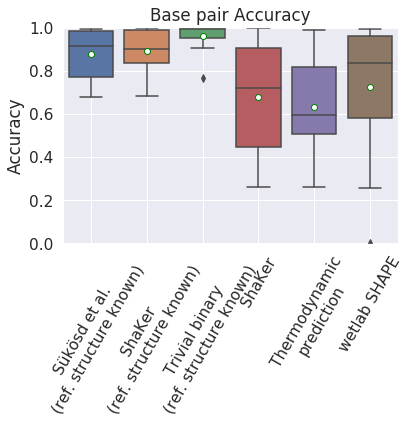

In [23]:

import seaborn as sns
sns.set_context("paper")
sns.set_style('darkgrid')
sns.set(font_scale=1.4)
plt.xticks(rotation=60)

meanpointprops = dict(marker='o', markeredgecolor='green',markerfacecolor='w')
sns.boxplot(data=zzz,meanprops=meanpointprops, showmeans=True)
#plt.legend() "no handles found"
plt.title("Base pair Accuracy")
plt.grid()
axes = plt.gca()
axes.set_ylim([-0.005,1.005])
axes.set_ylabel("Accuracy")
axes.grid(b=True, which='major', color='w', linewidth=1.0)
plt.savefig("Accuracy.pdf", bbox_inches='tight')

In [ ]:
# OUTPUT TABLE
#map(lambda x:x.append(np.mean(x)),data)
#df = pandas.DataFrame(data, columns=keys+['mean'], index=index).T
#print df.to_latex()
#from tabulate import tabulate 
#print tabulate(df, headers="keys", tablefmt="orgtbl")

---